<a href="https://colab.research.google.com/github/zeynep-okkiran/DSA210/blob/main/dsa_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# rearranging my data by deleting less columns to enrich my data
from google.colab import files
import io
import pandas as pd

df1 = pd.read_csv('happiness.csv')
df2 = pd.read_csv('life_expectancy.csv')

countries1 = set(df1['Country'])
countries2 = set(df2['Country'])

common_countries = countries1.intersection(countries2)

columns_to_delete1 = ['Region','Standard Error', 'Family','Trust (Government Corruption)','Dystopia Residual']

df1 = df1.drop(columns=columns_to_delete1)

merged_df = pd.merge(df1, df2, on='Country', how='inner')
merged_df['LifeExpectancyDiff'] = merged_df['Sum of Females  Life Expectancy'] - merged_df['Sum of Males  Life Expectancy']
print(merged_df.to_string())

                      Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  Health (Life Expectancy)  Freedom  Generosity  Sum of Females  Life Expectancy  Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy  LifeExpectancyDiff
0                 Switzerland               1            7.587                   1.39651                   0.94143  0.66557     0.29678                            85.95                                 84.09                          82.17                3.78
1                     Iceland               2            7.561                   1.30232                   0.94784  0.62877     0.43630                            84.47                                 83.01                          81.63                2.84
2                     Denmark               3            7.527                   1.32548                   0.87464  0.64938     0.34139                            83.98                                 82.09                    

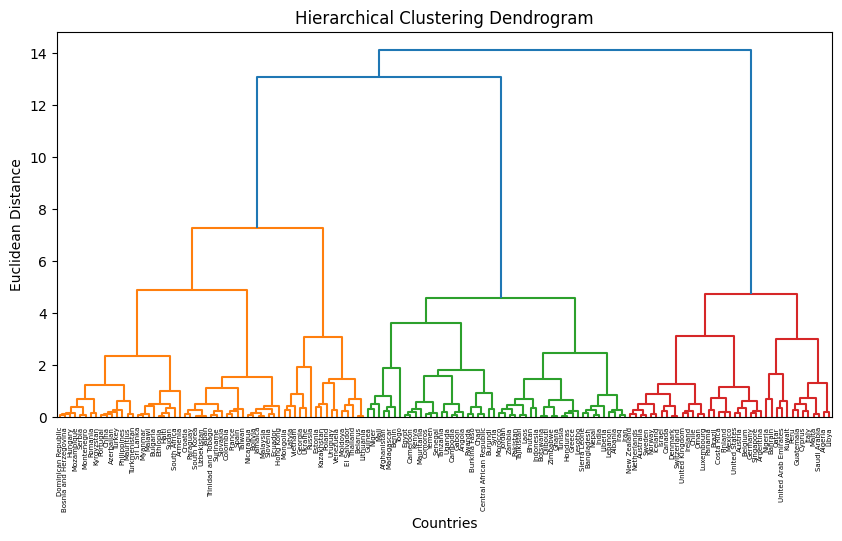

In [ ]:
# Unsupervised model: Hierarchical clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

clustering_data_hierarchical = merged_df[['LifeExpectancyDiff', 'Happiness Score']]

scaler_hierarchical = StandardScaler()
scaled_data_hierarchical = scaler_hierarchical.fit_transform(clustering_data_hierarchical)

hierarchical_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchical_model.fit(scaled_data_hierarchical)

linked = linkage(scaled_data_hierarchical, 'ward')

plt.figure(figsize=(10, 5))
dendrogram(linked,
            orientation='top',
            labels=merged_df['Country'].values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()


We can make a comment like the countries are divided into three main groups: the orange group of developing/emerging markets, the green group of large developed and resource-oriented economies, and the red group of very high-income small-to-medium-sized developed countries.

In [ ]:
n_clusters_chosen = 3

agg_clust_final = AgglomerativeClustering(n_clusters=n_clusters_chosen, linkage='ward')

agg_labels = agg_clust_final.fit_predict(scaled_data_hierarchical)

merged_df['Hierarchical_Cluster'] = agg_labels

print("\nCountry and assigned cluster labels (First 10):")
print(merged_df[['Country', 'Hierarchical_Cluster']].head(10))

print("\nNumber of countries in each cluster:")
print(merged_df['Hierarchical_Cluster'].value_counts())

print("\nNumber of countries in each cluster:")
print(merged_df.groupby('Hierarchical_Cluster')['Happiness Score'].mean())



Country and assigned cluster labels (First 10):
       Country  Hierarchical_Cluster
0  Switzerland                     1
1      Iceland                     1
2      Denmark                     1
3       Norway                     1
4       Canada                     1
5      Finland                     1
6  Netherlands                     1
7       Sweden                     1
8  New Zealand                     1
9    Australia                     1

Number of countries in each cluster:
Hierarchical_Cluster
0    59
2    50
1    39
Name: count, dtype: int64

Number of countries in each cluster:
Hierarchical_Cluster
0    5.450949
1    6.773000
2    4.280340
Name: Happiness Score, dtype: float64


Cluster 1 (39 countries; e.g., Switzerland, Iceland, Denmark, Norway…):
– Very high income, strong social safety nets, high quality of life → high happiness

Cluster 0 (59 countries; e.g., USA, Germany, Australia, Japan, Russia…):
– Upper-middle income level, some resource-oriented economies → medium-level happiness

Cluster 2 (50 countries; e.g., many countries in Asia, Africa, and Latin America):
– Lower-middle income level, developing economies → lower happiness

Linear Regression MSE: 0.4028371292165504
Linear Regression R2: 0.69933675117131

Linear Regression Coefficients:
LifeExpectancyDiff: 0.019319348326146176
Economy (GDP per Capita): 1.5087548076113928
Health (Life Expectancy): 0.7525620847497514
Freedom: 2.214159212510876
Generosity: 0.5220772867000429
Intercept: 2.4541017241707106


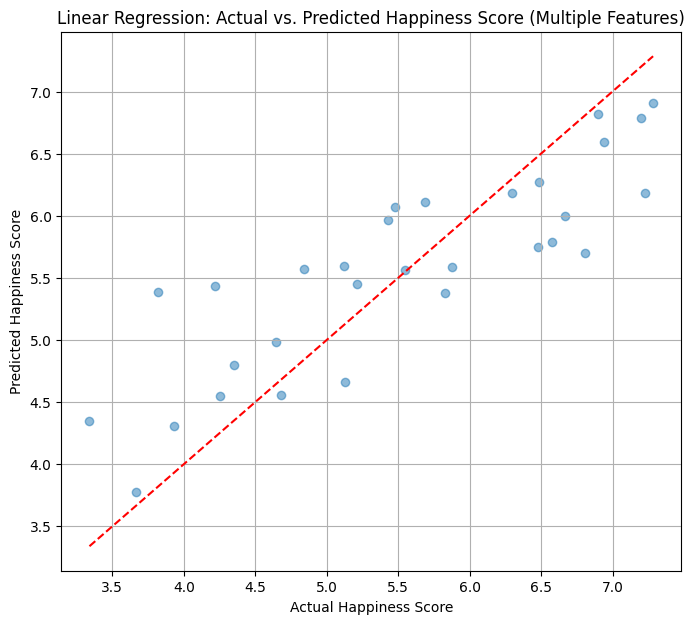

In [ ]:
X = merged_df[['LifeExpectancyDiff', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity']] # independent values
y = merged_df['Happiness Score'] # dependent values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")

print("\nLinear Regression Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {linear_model.coef_[i]}")
print(f"Intercept: {linear_model.intercept_}")

# Scatter plot of actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Perfect prediction line
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Linear Regression: Actual vs. Predicted Happiness Score (Multiple Features)')
plt.grid(True)
plt.show()

we can make a comment like "Economy" factor is more effective than "Health" because it's coefficient is greater than the Health's coefficient.

So, "Freedom" factor is the most determinant factor on the model. On the other hand,
Life Expectancy Differancy has very low efficiency on the happiness score.

Decision Tree Regression MSE: 0.4123784666666667
Decision Tree Regression R2: 0.692215437598497


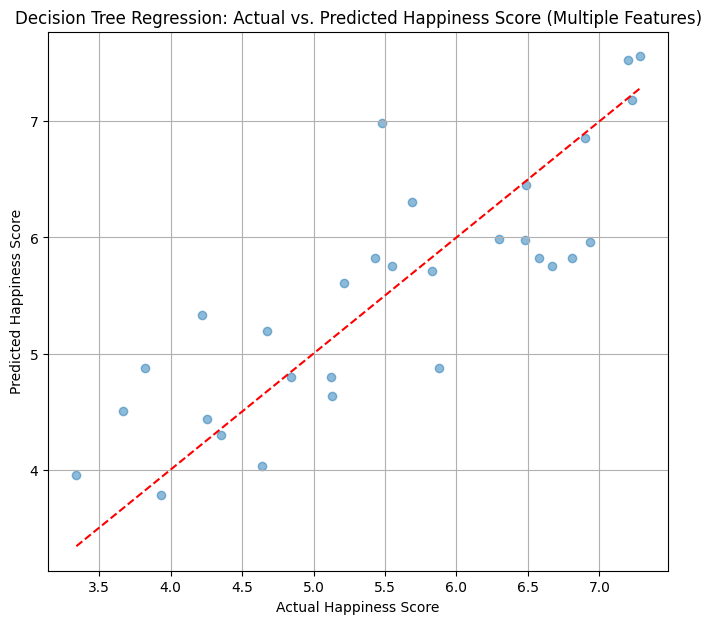

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = merged_df[['LifeExpectancyDiff', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity']] # independent values
y = merged_df['Happiness Score'] # dependent values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression MSE: {mse_tree}")
print(f"Decision Tree Regression R2: {r2_tree}")

plt.figure(figsize=(8, 7))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Decision Tree Regression: Actual vs. Predicted Happiness Score (Multiple Features)')
plt.grid(True)
plt.show()

Random Forest Regression MSE: 0.4270671978999994
Random Forest Regression R2: 0.6812522931078828


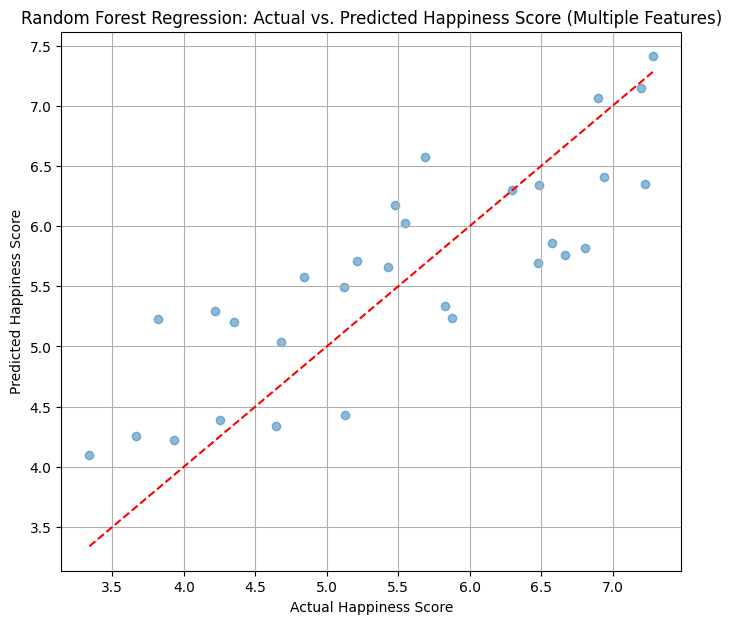

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = merged_df[['LifeExpectancyDiff', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity']] # independent values
y = merged_df['Happiness Score'] # dependent values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

y_pred_rf = random_forest_regressor.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression MSE: {mse_rf}")
print(f"Random Forest Regression R2: {r2_rf}")

plt.figure(figsize=(8, 7))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Random Forest Regression: Actual vs. Predicted Happiness Score (Multiple Features)')
plt.grid(True)
plt.show()

KNN Regression MSE: 0.4020466640000001
KNN Regression R2: 0.6999267261831872


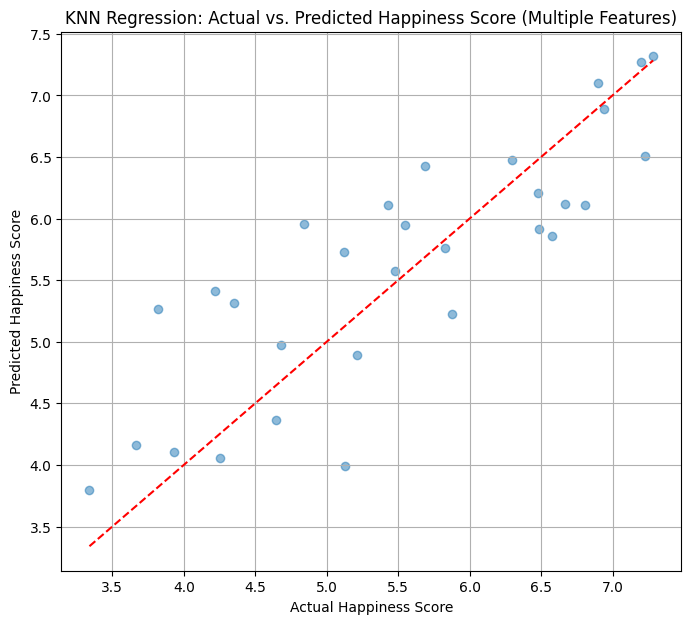

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = merged_df[['LifeExpectancyDiff', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity']] # independent values
y = merged_df['Happiness Score'] # dependent values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)


y_pred_knn = knn_regressor.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression MSE: {mse_knn}")
print(f"KNN Regression R2: {r2_knn}")

plt.figure(figsize=(8, 7))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('KNN Regression: Actual vs. Predicted Happiness Score (Multiple Features)')
plt.grid(True)
plt.show()

MSE comparison ->    Random Forest > Decision Tree > Linear > KNN

R² comparison ->     KNN > Linear > Decision Tree > Random Forest

so it shows that model predicts best is KNN regression.

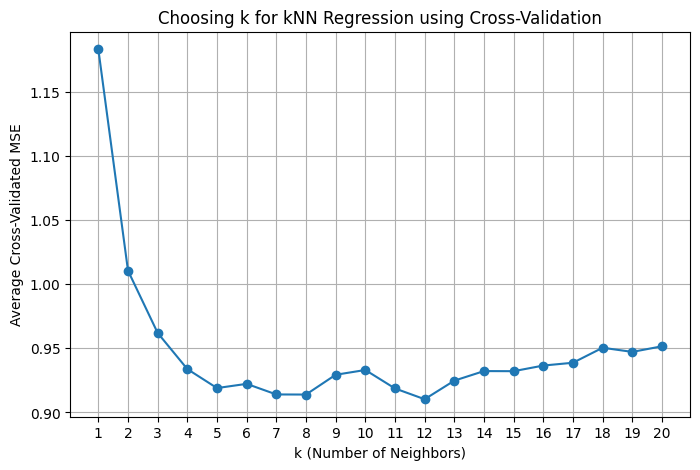

The k value with the lowest average cross-validated MSE is: 12
Minimum Average Cross-Validated MSE: 0.9103
Best k: 12


In [ ]:
# choosing best k with cross validation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X = merged_df[['LifeExpectancyDiff', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity']] # independent values
y = merged_df['Happiness Score'] # dependent values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = list(range(1, 21))
cv_scores = []

for k in k_values:

    model = KNeighborsRegressor(n_neighbors=k)

    # Perform 5-fold cross-validation and get the negative MSE scores
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the average MSE for this k (convert from negative MSE)
    cv_scores.append(-scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Average Cross-Validated MSE")
plt.title("Choosing k for kNN Regression using Cross-Validation")
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k_index = np.argmin(cv_scores)
best_k = k_values[best_k_index]
min_mse = cv_scores[best_k_index]

print(f"The k value with the lowest average cross-validated MSE is: {best_k}")
print(f"Minimum Average Cross-Validated MSE: {min_mse:.4f}")
print(f"Best k: {best_k}")


KNN Regression (k=12) MSE on Test Set: 0.3973
KNN Regression (k=12) R2 Score on Test Set: 0.7035


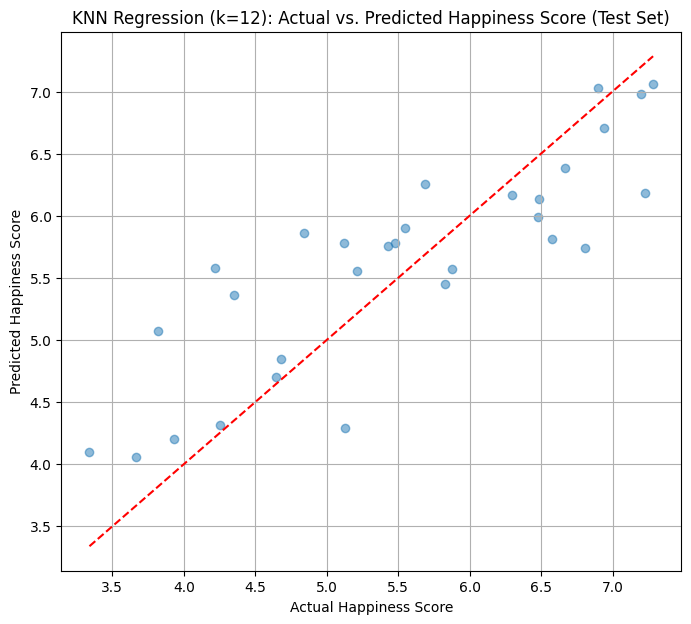

In [ ]:
# knn with best k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = merged_df[['LifeExpectancyDiff', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity']] # independent values
y = merged_df['Happiness Score'] # dependent values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN Regressor with n_neighbors = 12
knn_regressor_k12 = KNeighborsRegressor(n_neighbors=12)
knn_regressor_k12.fit(X_train_scaled, y_train)

y_pred_knn_k12 = knn_regressor_k12.predict(X_test_scaled)

mse_knn_k12 = mean_squared_error(y_test, y_pred_knn_k12)
r2_knn_k12 = r2_score(y_test, y_pred_knn_k12)

print(f"KNN Regression (k=12) MSE on Test Set: {mse_knn_k12:.4f}")
print(f"KNN Regression (k=12) R2 Score on Test Set: {r2_knn_k12:.4f}")

plt.figure(figsize=(8, 7))
plt.scatter(y_test, y_pred_knn_k12, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('KNN Regression (k=12): Actual vs. Predicted Happiness Score (Test Set)')
plt.grid(True)
plt.show()